In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import tree, svm, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import sensitivity_specificity_support
df=pd.read_csv('CHI.csv')

In [2]:
X= df[[
'S4HIMATH_I',
'S4UNEMPCOMP_I',
'X2WHITE',
'X3HSCOMPSTAT',
'X4EVRTRANSHS',
'X4HSCOMPSTAT',
'X2RACE',
'X2SEX',
'X4EVERDROP',
'X3TGPAWGT',
'X3TGPATOT',
'X3TCREDTOT',
'X3TCREDACAD',
'X3TCREDMTSC',
'X3TGPAACAD',
'X3TGPASTEM',
'X3TGPASOCST',
'X3DROPOUTTIME',
'X3CONTROL',
'A2SUMRSCH',
'S4EVERWRYMNY',
    'X1FAMINCOME',
    'X2PAREDU',
    'X3TGPAMAT',
    'X3T1CREDPREC',
    'X3TCREDREM',
    'X2REQLEVEL'
]].values

y=df[['X4EVRAPPCLG']].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
from sklearn.svm import SVC


svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train, y_train)

print('Training accuracy', np.mean(svm.predict(X_train) == y_train)*100)
print('Test accuracy', np.mean(svm.predict(X_test) == y_test)*100)

C:\Users\Maryam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy 51.23418928079929
Test accuracy 50.762407057950675


In [7]:

pip install mlxtend

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info



During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 512, in _warn_about_conflicts
    package_set, _dep_info = check_install_conflicts(to_install)
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_internal\operations\check.py", line 114, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_internal\operations\check.py", line 53, in create_package_set_from_installed
    package_set[name] = PackageDetails(dist.version, dist.requires())
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2736, in requires
    dm = self._dep_map
  File "C:\Users\Maryam\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3023, in _dep_map
    self.__dep_map = self._compute_dependencies()
  File "C:\Users\M

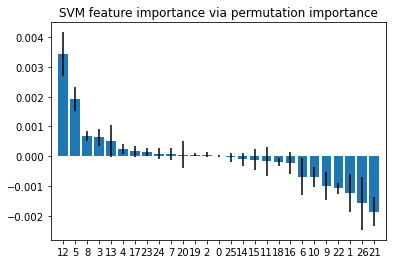

In [8]:
from mlxtend.evaluate import feature_importance_permutation
imp_vals, imp_all = feature_importance_permutation(
    predict_method=svm.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=10,
    seed=1)


std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("SVM feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()